In [1]:
import json
import pandas as pd
from collections import defaultdict

In [12]:
def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

def create_cooccurrence_matrix(data):
    # Extract all unique words and occupations
    all_words = set()
    for occupation, info in data.items():
        for word_dict in info['frequent_words']:
            all_words.update(word_dict.keys())

    # Convert set to list to preserve order and ensure DataFrame can use it as columns
    all_words = list(all_words)

    # Initialize the matrix
    matrix = pd.DataFrame(0, index=data.keys(), columns=all_words)

    # Populate the matrix
    for occupation, info in data.items():
        for word_dict in info['frequent_words']:
            for word, count in word_dict.items():
                matrix.at[occupation, word] += count

    return matrix


In [13]:
json_path = 'output/occupation_report.json'
data = load_data(json_path)
matrix = create_cooccurrence_matrix(data)

# Print the matrix
print(matrix)
# matrix.to_csv('occupation_attribute_matrix.csv')  

                    head  entertainment  climbed  roberson  seven  pa  \
singer                 0              0        0         0      0   0   
actress                0              0        0         0      0   0   
businesswoman          0              0        0         0      0   0   
politician             0              0        0         0      0   0   
composer               0              0        0         0      0   0   
...                  ...            ...      ...       ...    ...  ..   
fitness instructor     0              0        0         0      0   0   
data scientist         0              0        0         0      0   0   
parliamentarian        0              0        0         0      0   0   
locksmith              0              0        0         0      0   0   
naval surgeon          0              0        0         0      0   0   

                    tannahill  legislature  officer  time  ...  world  \
singer                      0            0        

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def load_matrix(csv_path):
    return pd.read_csv(csv_path, index_col=0)

def visualize_matrix(matrix, threshold=0):
    # Filter the matrix to remove columns and rows where the sum is below the threshold
    filtered_matrix = matrix.loc[:, (matrix.sum(axis=0) > threshold)]
    filtered_matrix = filtered_matrix.loc[(filtered_matrix.sum(axis=1) > threshold), :]

    # Generate a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_matrix, annot=True, fmt="d", cmap="viridis")
    plt.title('Co-occurrence Matrix Heatmap')
    plt.xlabel('Attributes')
    plt.ylabel('Occupations')
    plt.show()


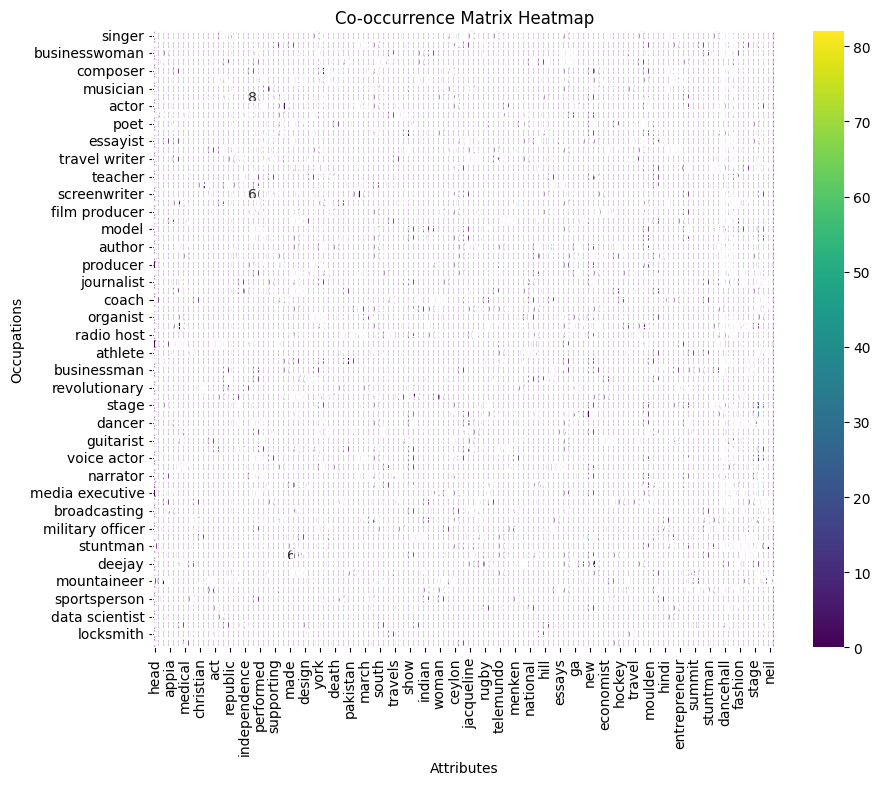

In [16]:
# csv_path = 'occupation_attribute_matrix.csv' 
# matrix = load_matrix(csv_path)
visualize_matrix(matrix, threshold=5)